<a href="https://colab.research.google.com/github/NamigJ/business_school_project/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import os

# Create the folder if it doesn't already exist
os.makedirs("Namig_Amrah", exist_ok=True)


In [1]:
!pip install pandas matplotlib --quiet

In [2]:
!wget -q https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip -q ml-latest-small.zip


In [3]:
import pandas as pd
ratings = pd.read_csv("ml-latest-small/ratings.csv")
movies  = pd.read_csv("ml-latest-small/movies.csv")
print("Ratings", ratings.shape, "Movies", movies.shape)


Ratings (100836, 4) Movies (9742, 3)


In [4]:
movies["genres"] = movies["genres"].fillna("").astype(str)   # <<< new fix cell
movies["genres"] = movies["genres"].str.split("|")
long = movies[["movieId","genres"]].explode("genres")

In [5]:
df = ratings.merge(long, on="movieId")
avg_by_genre = df.groupby("genres")["rating"].mean().sort_values(ascending=False)

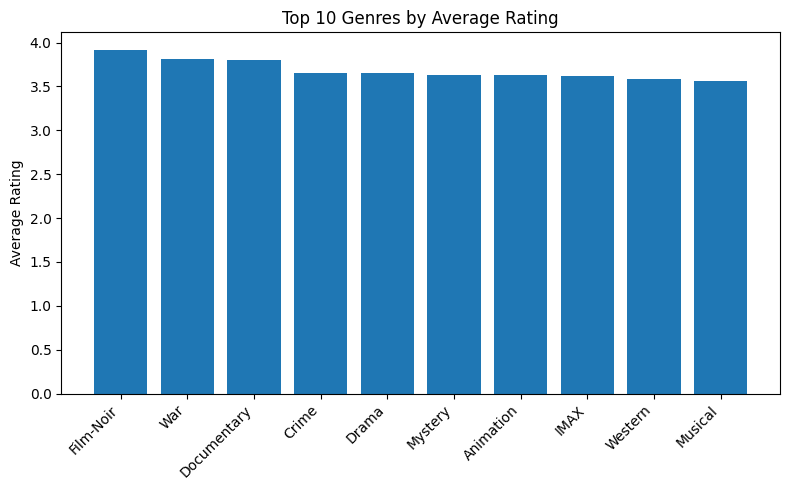

In [8]:
import matplotlib.pyplot as plt
top10 = avg_by_genre.head(10)
plt.figure(figsize=(8,5))
plt.bar(top10.index, top10.values)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Genres by Average Rating")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.savefig("Namig_Amrah/avg_rating_by_genre.png")
plt.show()